# Illustration of LC-MS concepts

We use pymzml library to read an mzML file, and matplotlib library to visualize the data.

In [12]:
# install as needed

!pip3 install asari-metabolomics

In [13]:
# for this example, lets use the MT02 dataset which is a set of acquisitions collected on human plasma. 

!ls ../Datasets/MT02Dataset/

MT02Data.md
batch11_MT_20210805_005.mzML
batch12_MT_20210806_005_20210806121327.mzML
batch13_MT_20210807_005.mzML
batch14_MT_20210808_005.mzML
batch14_MT_20210808_087.mzML
batch14_MT_20210808_089.mzML
batch14_MT_20210808_179.mzML
batch14_MT_20210808_181.mzML


In [14]:
import pymzml
import matplotlib.pyplot as plt

## Read spectra and visualize a spectrum

In [6]:
infile = '../Datasets/MT02Dataset/batch14_MT_20210808_181.mzML'

# This reads the mzML file. Warnings can be ignored. 
sample181 = pymzml.run.Reader(infile)

# Get spectra
spectra = [x for x in sample181]

# How many 
len(spectra)

[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False


783

Retention time (minute):  0.640598558666667 
 Number of data points:  1316


Text(0.5, 1.0, 'Spectrum, scan number 100')

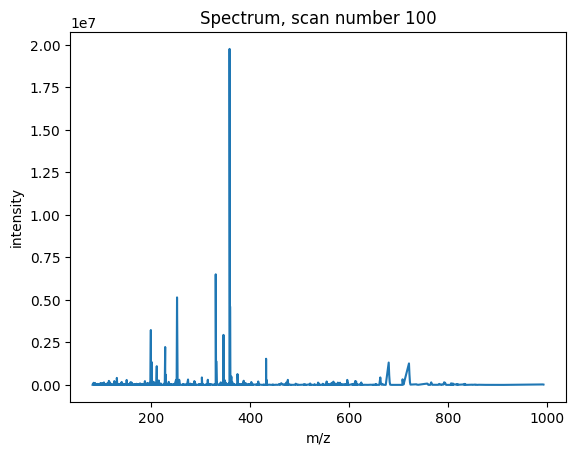

In [7]:
# Visualizing a spectrum, let's use scan number 100
scan_number = 100
sc = spectra[scan_number-1]

print("Retention time (minute): ", sc.scan_time_in_minutes(),
      "\n",
      "Number of data points: ", len(sc.mz))
 
plt.plot(sc.mz, sc.i)
plt.xlabel("m/z")
plt.ylabel("intensity")
plt.title("Spectrum, scan number %d" %scan_number)

Text(0.5, 1.0, 'Zoom in')

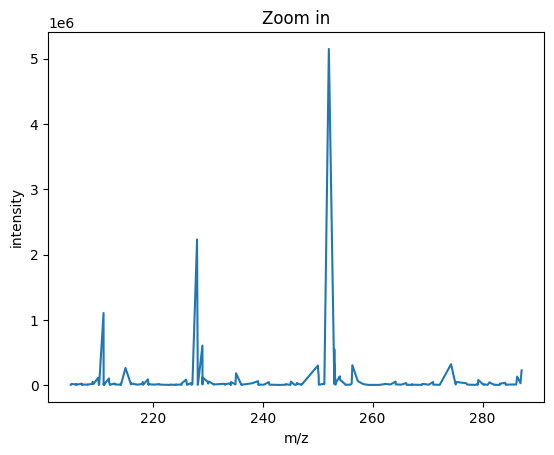

In [8]:
# Zoom into the middle region
start, end = 400, 600

plt.plot(sc.mz[start: end], sc.i[start: end])
plt.xlabel("m/z")
plt.ylabel("intensity")
plt.title("Zoom in")

## Visualizing EIC using asari

Asari is a software package for MS metabolomic data processing.

Asari uses "mass tracks", which are EICs (extracted ion chromatograms) in full length of chromatography.

In [9]:
from asari import chromatograms as ch

In [10]:
mass_tracks = ch.extract_massTracks_(sample181)

# What's in mass_tracks
print(mass_tracks.keys())

# How many EICs
print(len(mass_tracks['tracks']))

[Warning] Not index found and build_index_from_scratch is False
dict_keys(['rt_numbers', 'rt_times', 'tracks'])
7412


In [11]:
# What's in a mass track - say, mass track number 731
mass_tracks['tracks'][731]

(150.05836486816406,
 array([      0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,    7240,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,   13028,   74049,   94774,  237675,  305123,  372472,
         379498,  427674,  448844,  475543,  503653,  49

Text(0.5, 1.0, 'm/z 150.0584')

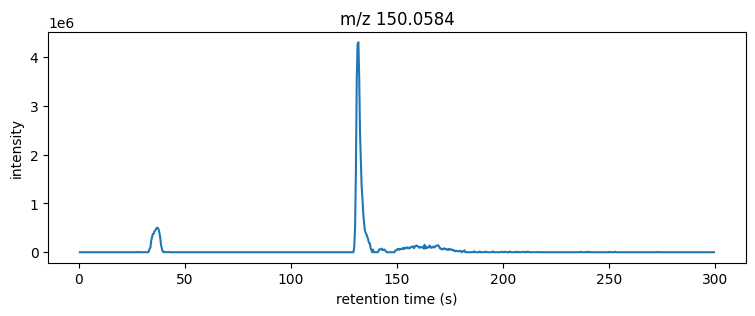

In [11]:
# Define figure size
plt.figure(figsize=(9, 3))

plt.plot(mass_tracks['rt_times'], mass_tracks['tracks'][731][1])
plt.xlabel("retention time (s)")
plt.ylabel("intensity")
plt.title("m/z 150.0584")

## Use asari to get stats on a mzML file

In [12]:
from asari.analyze import analyze_single_sample
from asari.default_parameters import PARAMETERS

In [13]:
analyze_single_sample(infile, parameters=PARAMETERS)
           

Analysis of ../../Datasets/MT02Dataset/batch14_MT_20210808_181.mzML

[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
Total number of MS1 spectra: 783
of which 783 are positive ionization mode.
Assuming ionization mode is pos.

Maxium retention time (sec): 299.618433
m/z range: (min 80.947853, median 334.273205, max 999.289795)

Found 7412 mass tracks.
Found 1586 12C/13C isotopic pairs as landmarks.
Max intensity in any landmark track:  890,153,984
Minimal height of landmark tracks:  7,672 

Mass accuracy was estimated on 136 matched values as -0.3 ppm.




## Module Summary

We have examined a spectrum in a human plasma sample (batch14_MT_20210808_181.mzML, Qstd, HILICpos).

We have used asari to extract mass tracks and visualized one of them.

Statistics of mass tracks on a single file was demonstrated by using asari. This can be done by running asari command line too.